# 新型コロナウィルス感染症(CoVid-19)拡大状況を可視化・分析してみる（世界編）

# モジュールのインポートとデータの読み込み
まずは必要なモジュールをインポートする．

In [33]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime

# 世界のCoVid-19感染状況を可視化する
各国の CoVid-19 感染状況をインタラクティブに可視化したサイトとしては，下記のようなものがある：
- [CoVid19 Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) | [the Center for Systems Science and Engineering (CSSE) at Johns Hopkins Univ](https://systems.jhu.edu).
- [COVID19 Projections](https://covid19.healthdata.org/united-states-of-america) | [The Institute for Health Metrics and Evaluation (IHME) at Washington Univ.](http://www.healthdata.org)
- [Daily updated estimates for Europe](https://mrc-ide.github.io/covid19estimates/#/details/United_Kingdom) | [MRC Centre for Global Infectious Disease Analysis at Imperial College London](http://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/covid-19/)
- [Coronavirus Pandemic (COVID-19) | Our World in Data](https://ourworldindata.org/coronavirus)
- [COVID-19-Pandemic | ECDC](https://www.ecdc.europa.eu/en/covid-19-pandemic)
- [Coronavirus pandemic: Tracking the global outbreak](https://www.bbc.com/news/world-51235105) | [BBC](https://www.bbc.com)
- [Cases in the U.S.](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html) | [CDC](https://www.cdc.gov/coronavirus/2019-ncov/index.html)
- [Dashboard](https://covid19.who.int) | [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
- [COVID-19 CORONAVIRUS PANDEMIC | Worldmeter](https://www.worldometers.info/coronavirus/)
― [Rt Live](https://rt.live) | [Kevin Systrom](https://twitter.com/kevin)

## 各国の感染状況データの取得
各国の感染状況データを整理したサイトとしては，下記のようなものがある：
1. [CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)
2. [ECDC](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)
3.  [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)

今回は，最後の Our World in Data が公開している下記のデータを用いることにしよう：  
https://covid.ourworldindata.org/data/owid-covid-data.csv

まずは `read_csv` 関数を用いてCSVをデータフレームに読み込む．このデータは，元から`date`の列が`年-月-日`の書式で記載されているので，`datetime`型に直すのが楽だ．
日付を `datatime`型に置き換えたら，国内データと同じように取り扱えるように，国名と日付の2つを使ってマルチインデックス化しておく（このあたりも，詳細に踏み込みたくなければ**おまじない**だと思っておけばいい）．

In [34]:
# CSVをデータフレームに読み込む（ちょっと重い）
global_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# 年-月-日の文字列で記載されている年月日を datetime 型に変更
global_df["date"]=pd.to_datetime(global_df["date"], format="%Y-%m-%d")
# 県別でも扱ったマルチインデックスとして整形
global_df = global_df.set_index(["location", "date"])
global_df # global_df の概観を表示

iso_code  ... human_development_index
location    date                 ...                        
Afghanistan 2020-02-24      AFG  ...                   0.511
            2020-02-25      AFG  ...                   0.511
            2020-02-26      AFG  ...                   0.511
            2020-02-27      AFG  ...                   0.511
            2020-02-28      AFG  ...                   0.511
...                         ...  ...                     ...
Zimbabwe    2021-05-20      ZWE  ...                   0.571
            2021-05-21      ZWE  ...                   0.571
            2021-05-22      ZWE  ...                   0.571
            2021-05-23      ZWE  ...                   0.571
            2021-05-24      ZWE  ...                   0.571

[91024 rows x 57 columns]

データが登録されている国名一覧は，次のセルのようにして調べられる．簡単に解説しておくと
- `global_df.index` でデータフレームのインデックスを取得，
- 得られたインデックスに対して[`.get_level_value(0)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)とすることでインデックスの第0レベル（国名）を取得，
- 得られた第0レベルのインデックスに対して [`.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) とすることで重複した要素を除去し，
- 得られた[`Index`型](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)インスタンスの [`.values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)メンバを参照している．

In [35]:
country_set = global_df.index.get_level_values(0).unique().values # country_set に国名一覧を代入
country_set # country_set の中身を表示

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe

In [36]:
len(country_set)

226

## 特定の国のデータにアクセスする
特定の国のデータにアクセスするには，

In [37]:
ctry_df = global_df.loc["United Kingdom"] # 英国のデータからなるデータフレームを構築

とする．上記のセルを実行すると，`ctrl_df` に英国のデータからなるデータフレームが代入される．次のセルを実行して中身を概観しておこう．

In [38]:
ctry_df # ctry_df を表示

,iso_code,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,GBR,Europe,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-02-01,GBR,Europe,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-02-02,GBR,Europe,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-02-03,GBR,Europe,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-02-04,GBR,Europe,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,GBR,Europe,4471065.0,2699.0,1522.857,127963.0,7.0,7.286,65861.367,39.758,22.433,1884.969,0.103,0.107,1.18,123.0,1.812,908.0,13.375,NaN,NaN,NaN,NaN,982099.0,170774076.0,2515.601,14.467,965874.0,14.228,0.002,634.3,tests performed,59178397.0,37518614.0,21659783.0,688563.0,534776.0,87.17,55.27,31.91,7878.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-05-21,GBR,Europe,4473773.0,2708.0,1595.714,127972.0,9.0,6.000,65901.257,39.890,23.506,1885.101,0.133,0.088,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715414.0,171561923.0,2527.206,10.538,970397.0,14.295,0.002,608.1,tests performed,59824737.0,37738271.0,22086466.0,646340.0,539472.0,88.13,55.59,32.53,7947.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-05-22,GBR,Europe,4476297.0,2524.0,1662.000,127978.0,6.0,5.857,65938.437,37.180,24.482,1885.190,0.088,0.086,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499089.0,172094944.0,2535.058,7.352,976455.0,14.384,0.002,587.5,tests performed,60587098.0,37943681.0,22643417.0,762361.0,558584.0,89.25,55.89,33.36,8228.0,NaN,6788

このデータフレームの症例数および死亡数にアクセスするには，以下のようにする：

In [39]:
cases = ctry_df["total_cases"] # 累積症例数
deaths = ctry_df["total_deaths"] # 累積死亡数

これにより，`cases`と`deaths`のそれぞれに，累積症例数/死亡者数が格納される．

各日の新規症例数/死亡数（差分）を求めるには，[`diff`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)を用いる．

In [40]:
daily_cases = cases.diff() # 新規症例数
daily_deaths = deaths.diff() # 新規死亡数

ちなみに，わざわざ計算しなくても，このデータセットでは

In [41]:
daily_cases = ctry_df["new_cases"] # 新規症例数
daily_deaths = ctry_df["new_deaths"] # 新規死亡数

でアクセスできる．こうして得られたデータフレームを `pyplot.plot`関数や`pyplot.bar`関数に渡せば，グラフが描画される：

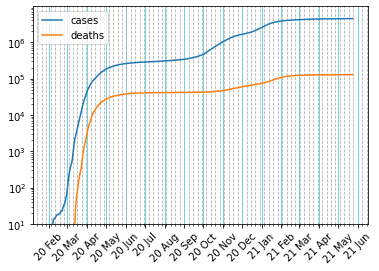

In [42]:
# 累積症例数および死亡数を折れ線グラフでプロット
plt.plot(cases, label="cases")
plt.plot(deaths, label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

#
# x軸の目盛りの見栄えを修正する関数を定義する（国内データの描画で用いたものと同じ）
#
def fancy_ax(ax):
    ax = plt.gca() # 現在表示されているグラフのx/y軸を取得
    ## x軸の目盛を修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.8) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=45)
    ## x軸の副目盛りを修正
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator()) # 副目盛りを週ごとに設定
    ax.grid(which='minor', axis='x', linestyle='--') # 副目盛りのグリッドの線種を点線にする

    ## x軸の主目盛りを修正
    #ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    #ax.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # 主目盛りの表示を英語の月名短縮形にする
    #list(map(lambda x: x.set_y(-.15), ax.xaxis.get_majorticklabels())) # 主目盛りラベルの位置を下へ少しずらす
    #ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    #ax.set_xticklabels([], minor=False)
    ## x軸の副目盛りを修正
    #ax.xaxis.set_minor_locator(mdates.WeekdayLocator()) # 副目盛りを週ごとに設定
    #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m-%d")) # 副目盛りの表示を 03-31のように月-日にする
    #plt.setp(ax.get_xticklabels(which='minor'), rotation=45) # 副目盛りラベルを45度回転させる
    #ax.grid(which='minor', axis='x', linestyle='--') # 副目盛りのグリッドの線種を点線にする
    return ax

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

毎日の新規症例数と死亡者数もプロットしてみよう．以下では，[`fill_between`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html)を用いて，日次症例数/死亡数を描画している．

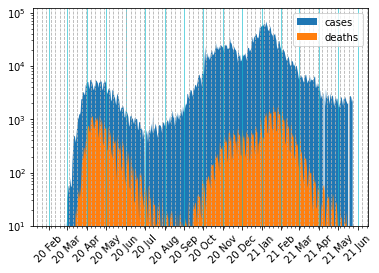

In [43]:
# 日次症例数および死亡数を棒グラフでプロット
plt.fill_between(daily_cases.index, daily_cases, label="cases")
plt.fill_between(daily_deaths.index, daily_deaths, label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

国内データと同様，日次データは変動が大きい上，曜日の影響を受けやすい（土日は検査がないので報告症例数が小さくなりがち）ので，7日間の移動平均をとったものの方が使い勝手がよいかもしれない．移動平均は [`rolling`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)と[`mean`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)を使うと簡単に求められる．ここも「習うより慣れろ」で使ってみよう．

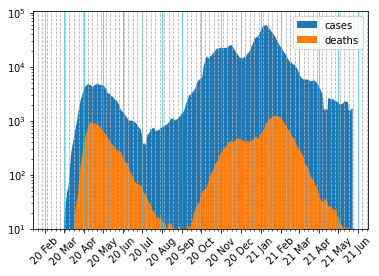

In [44]:
# 日次症例数および死亡数の7日間移動平均を棒グラフでプロット
window = 7 # 移動平均を求める期間の長さ
plt.fill_between(daily_cases.index, daily_cases.rolling(window).mean(), label="cases")
plt.fill_between(daily_deaths.index, daily_deaths.rolling(window).mean(), label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

累積曲線と日次データをまとめてプロットしてみよう．以下は，`country` という変数に代入された国名に対応する症例数と死亡数を，それぞれ，累積件数と日次新規件数でプロットする．
国内データと異なるのは，累積件数と新規件数を同じy軸で表示している点だ．

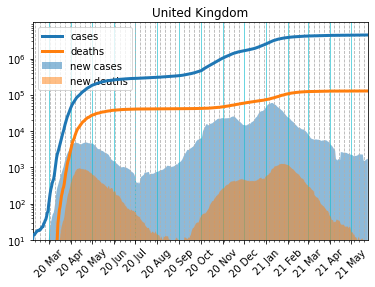

In [45]:
country = "United Kingdom" # プロットしたい国名を代入
window = 7 # 移動平均を求める期間の長さ

ctry_df = global_df.loc[country] # 当該国のデータフレーム
cases = ctry_df["total_cases"] # 累積症例数
deaths = ctry_df["total_deaths"] # 累積死亡数
daily_cases = ctry_df["new_cases"] # 新規症例数
daily_deaths = ctry_df["new_deaths"] # 新規死亡数

# x軸の表示範囲を適切にするために，累積症例数が10を超えた最初の日を記録しておく
xmin = cases[cases>10].index[0]
xmax = cases.index[-1]

# 累積症例数/死亡者数
plt.plot(cases, label="cases",linewidth=3, zorder=10)
plt.plot(deaths, label="deaths",linewidth=3, zorder=10)

# 日次症例数/死亡者数（alpha=0.5として半透過させている）
plt.fill_between(daily_cases.index, daily_cases.rolling(window).mean(), label="new cases", alpha=0.5, zorder=1)
plt.fill_between(daily_deaths.index, daily_deaths.rolling(window).mean(), label="new deaths", alpha=0.5, zorder=2)
# 片対数グラフにする
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

# 軸の見栄えを整える
ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
ax.legend(loc='upper left')
plt.xlim((xmin,xmax))
plt.title(country)

# 国の名前を付けてグラフを保存する
plt.savefig("cases_deaths-%s.pdf" % country) 
plt.show()


# 死亡数が多い国の感染状況を可視化する
## 死亡数の多い国を探す
死亡者数の多い国を調べるには，以下の手順を行えばよい：
1. データフレームの累積死亡者数を国別にグループ化し，それぞれのグループの最後の要素（最新の累積死亡者数）を取り出す
2. 世界全体の累積死亡者数を表す行（"World"というインデックスがついている）を取り除く
3. [`sort_values`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)に `ascending=False` オプション引数を与え，大きい方から順（descending order）に並べ替える
4. [`head`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)を使って上位の要素を取り出す

この手続きは，以下のセルのように実装される：

In [46]:
rank = 30 # 上位何位までを表示するか
top_deaths = global_df["total_deaths"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths = top_deaths[top_deaths.index != "World"] # 世界全体の死亡者数を表す World の行を取り除く
top_deaths = top_deaths.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
top_deaths

location
Europe            1064607.0
North America      871086.0
South America      755860.0
European Union     720097.0
Asia               651905.0
United States      590533.0
Brazil             449858.0
India              307231.0
Mexico             221695.0
Africa             128677.0
United Kingdom     127986.0
Italy              125335.0
Russia             116812.0
France             108819.0
Germany             87461.0
Colombia            85207.0
Spain               79711.0
Iran                78848.0
Argentina           74480.0
Poland              72945.0
Peru                68053.0
South Africa        55874.0
Ukraine             51425.0
Indonesia           49455.0
Turkey              46446.0
Czechia             30028.0
Romania             29977.0
Hungary             29560.0
Chile               28548.0
Canada              25231.0
Name: total_deaths, dtype: float64

## 人口あたり死亡数の多い国を探す
同じことを，`"total_death_per_million"`という列に対して行うと，人口あたりの死亡者数が大きい順に取り出せる．

In [47]:
rank = 30 # 上位何位までを表示するか
top_deaths_pm = global_df["total_deaths_per_million"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths_pm = top_deaths_pm[top_deaths_pm.index != "World"] # 世界全体の死亡者数を表す World の行を取り除く
top_deaths_pm = top_deaths_pm.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
top_deaths_pm

location
Hungary                   3059.931
Czechia                   2804.001
Bosnia and Herzegovina    2788.941
San Marino                2651.895
North Macedonia           2557.863
Bulgaria                  2520.420
Montenegro                2506.122
Slovakia                  2252.162
Belgium                   2144.420
Brazil                    2116.387
Slovenia                  2094.826
Italy                     2072.961
Peru                      2063.973
Croatia                   1931.421
Poland                    1927.386
United Kingdom            1885.308
United States             1784.073
South America             1754.714
Mexico                    1719.462
Spain                     1704.874
Colombia                  1674.571
Portugal                  1668.970
Argentina                 1647.942
Andorra                   1643.694
European Union            1618.490
France                    1610.600
Romania                   1558.244
Lithuania                 1540.981
Liechtenste

## 「死亡数」と「人口あたり死亡数」のどちらも多い国について，散布図をプロットする
「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国（2つのデータフレームのインデックスの共通部分）は，[`pandas.Index.intersecton`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.intersection.html)を使って，
```python
country_set = top_deaths.index.intersection(top_deaths_pm.index)
```
とすることで求められる．

                  deaths  deaths per mil.
location                                 
South America   755860.0         1754.714
European Union  720097.0         1618.490
United States   590533.0         1784.073
Brazil          449858.0         2116.387
Mexico          221695.0         1719.462
United Kingdom  127986.0         1885.308
Italy           125335.0         2072.961
France          108819.0         1610.600
Colombia         85207.0         1674.571
Spain            79711.0         1704.874
Argentina        74480.0         1647.942
Poland           72945.0         1927.386
Peru             68053.0         2063.973
Czechia          30028.0         2804.001
Romania          29977.0         1558.244
Hungary          29560.0         3059.931


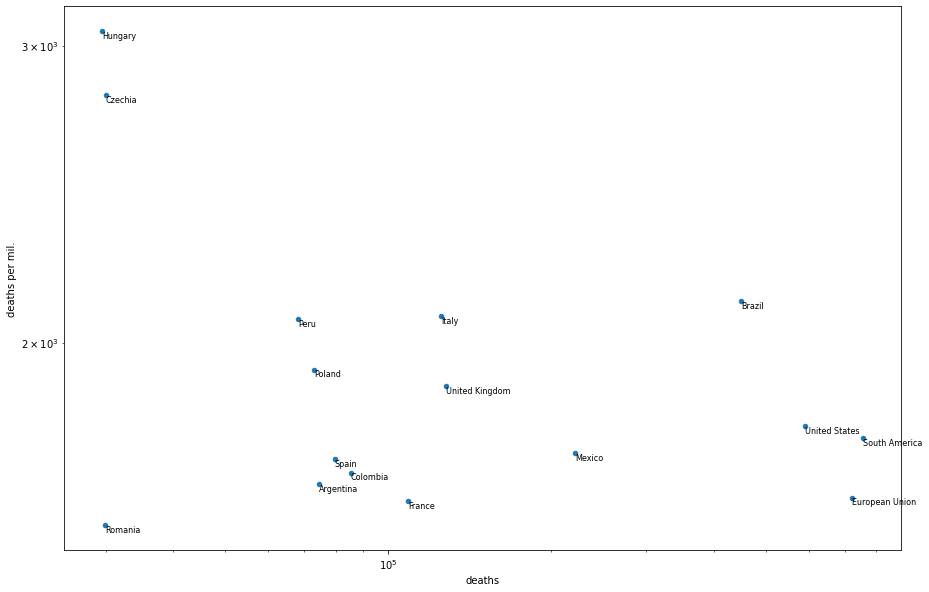

In [48]:
# 「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国
country_set = top_deaths.index.intersection(top_deaths_pm.index)
#country_set = country_set.union({'World', 'Japan'})  # 世界全体と日本を加える

# country_set に含まれる国の「死亡数」と「人口あたり死亡数」を取得し直し，dfというデータフレームに格納する
df = global_df[["total_deaths","total_deaths_per_million"]].groupby("location").last()
df.columns = ["deaths", "deaths per mil."]
df = df[df.index.isin(country_set)]
print(df.sort_values("deaths", ascending=False)) # 対象となる国を死亡数の多い順に並べ替えて表示

# 散布図をプロットする
ax = df.plot.scatter("deaths", "deaths per mil.", figsize=(15,10))
ax.set_xscale('log')
ax.set_yscale('log')
for country in country_set:
    tmp_df = df.loc[country]
    ax.annotate(country, color="black", xy=(df.loc[country]["deaths"], df.loc[country]["deaths per mil."]), size=8, ha='left', va='top')

## 複数の国の感染状況を1枚の図にプロットする
国内の場合と同様に，`for`による繰り返しと`subplot`を活用することで，複数の国の艦船状況をまとめて一枚の図に表示できる．

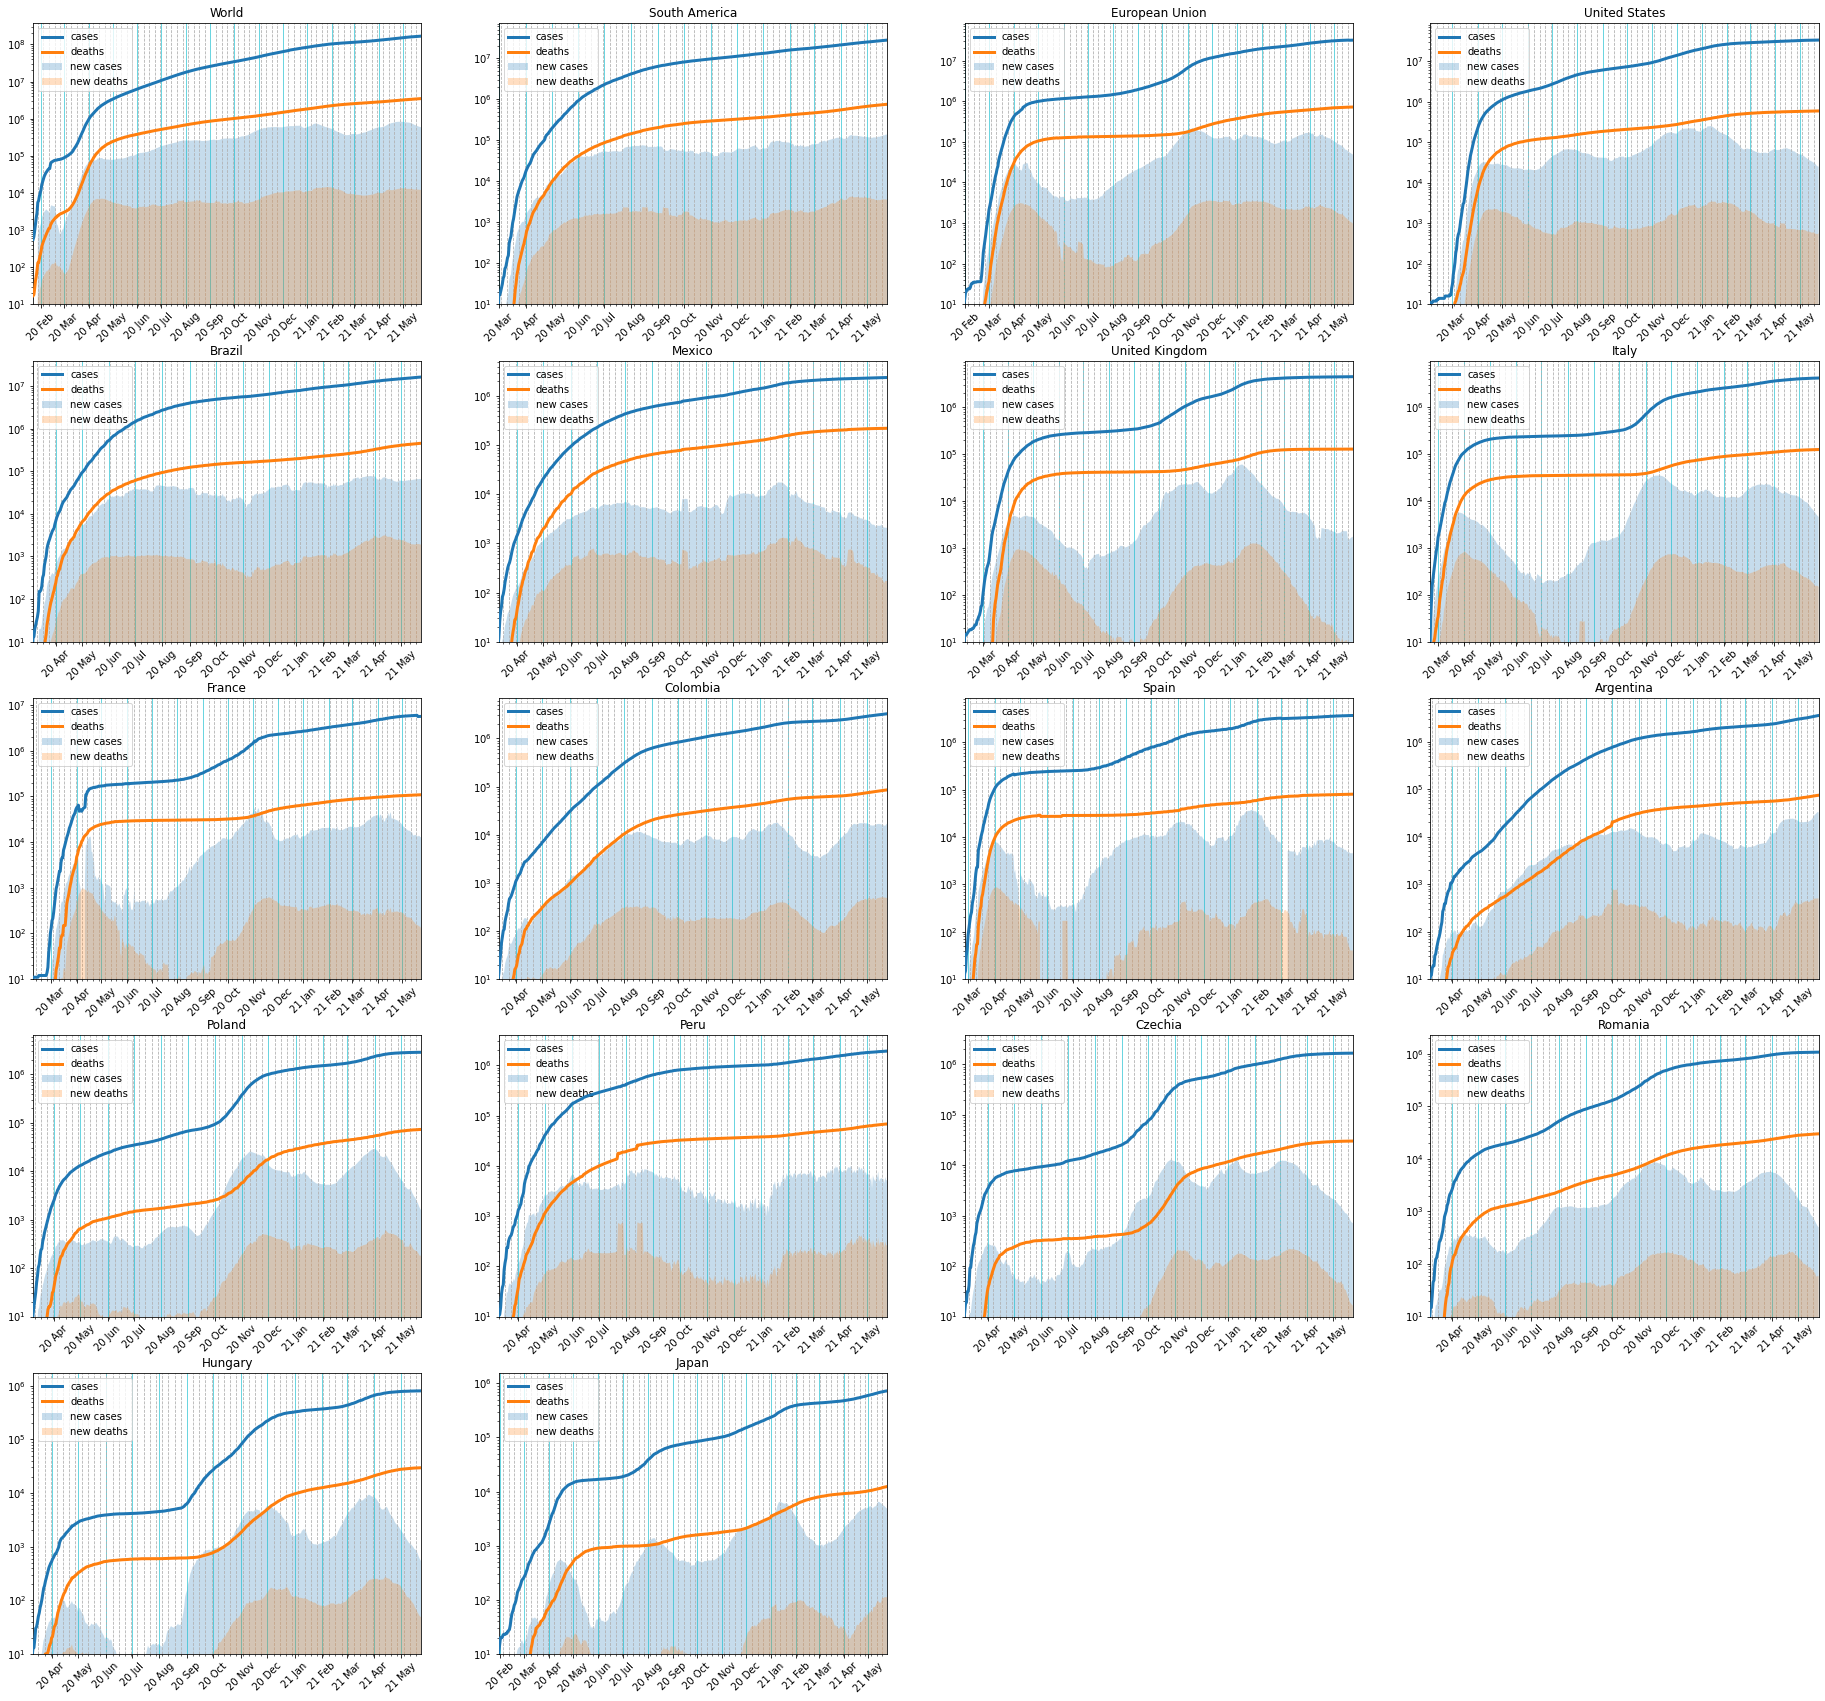

In [49]:
#
# 「死亡数」と「人口あたり死亡数」のどちらも多い国を抽出する
#

rank = 30 # 上位何位までを表示するか
# 死亡数の多い国
top_deaths = global_df["total_deaths"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths = top_deaths[top_deaths.index != "World"] # 世界全体の死亡者数を表す World の行を取り除く
top_deaths = top_deaths.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
# 人口あたり死亡数の多い国
top_deaths_pm = global_df["total_deaths_per_million"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths_pm = top_deaths_pm[top_deaths_pm.index != "World"] # 世界全体の死亡者数を表す World の行を取り除く
top_deaths_pm = top_deaths_pm.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す

# 「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国を抽出する
country_set = top_deaths.index.intersection(top_deaths_pm.index)
# 世界全体('World')と日本('Japan')を country_set に（含まれていなければ）追加する
country_set = country_set.union({'World', 'Japan'}) 

# country_set に含まれる国のデータだけでデータフレームを構築し，top_dfに格納する
top_df = global_df[global_df.index.get_level_values("location").isin(country_set)]
# country_set を「死亡数」の多い順に並べ替える
country_set = top_df["total_deaths"].groupby("location").last().sort_values(ascending = False).index
# country_set = ["Japan", "United States", "United Kingdom"] # 自分で選んだ国についてプロットする場合は，この行の行頭のコメントを外し，国名を修正する

#
# グラフ描画
#
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(country_set)/cols) # タイルの行数
fig = plt.figure(figsize=(8*cols, 6*rows))

for (cid, country) in enumerate(country_set):
    window = 7 # 移動平均を求める期間の長さ
    ctry_df = top_df.loc[country] # 当該国のデータフレーム
    cases = ctry_df["total_cases"] # 累積症例数
    deaths = ctry_df["total_deaths"] # 累積死亡数
    daily_cases = ctry_df["new_cases"] # 新規症例数
    daily_deaths = ctry_df["new_deaths"] # 新規死亡数

    # add_subplot を使って複数の図をタイル状に配置
    ax = fig.add_subplot(rows, cols, cid+1)
    
    # x軸の表示範囲を適切にするために，累積症例数が10を超えた最初の日を記録しておく
    xmin = cases[cases>10].index[0]
    xmax = cases.index[-1]

    # 累積症例数/死亡者数
    ax.plot(cases, label="cases",linewidth=3, zorder=10)
    ax.plot(deaths, label="deaths",linewidth=3, zorder=10)

    # 日次症例数/死亡者数（alpha=0.5として半透過させている）
    ax.fill_between(daily_cases.index, daily_cases.rolling(window).mean(), label="new cases", alpha=0.25, zorder=1)
    ax.fill_between(daily_deaths.index, daily_deaths.rolling(window).mean(), label="new deaths", alpha=0.25, zorder=2)
    # 片対数グラフにする
    ax.set_yscale('log')
    ax.set_ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

    # 軸の見栄えを整える
    ax = fancy_ax(ax) # x軸の見栄えを整える
    ax.legend(loc='upper left')
    ax.set_xlim((xmin,xmax))
    ax.set_title(country)

plt.show()

# 死亡数が急速に伸びている国を探す
感染症は拡大初期には指数関数的に感染者および死亡者が増加することが知られている． 日本でも，第二波，第三波，第四波と，感染者数の急拡大が観測されている．ここでは，死亡数が多い国や死亡数が急速に伸びている国の感染状況を調べてみることにしよう．

## 国別の症例数/死亡数の週間成長率を求める
まず，各国について，死亡数の週間成長率：
$$
r(d) = \frac{X(d)-X(d-7)}{X(d-7)}
$$

を計算し，`global_df["grt_deaths"]`という列として加えよう．データフレームを国別にグループ化するには，[`groupby`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)を用いる．ただし，その仕様を正確に把握するのは（実は長江にも）ちょっと難しいので，まずは**おまじない**として使っておこう．

例えば，こんな感じ：
```python
global_df # 元のデータフレーム
global_df["total_cases"] # 元のデータフレームの累積症例数の列
global_df["total_cases"].groupby("location") # 累積症例数を国別にグループ化したもの
```

こうして国別にグループ化されたデータフレームに対して`diff`関数と`shift`関数を用いれば，成長率が計算できる．ただし，感染拡大初期の極めて累積件数が小さい時の成長率はあまり役に立たないので，累積症例数/死亡数のそれぞれがある閾値以上の日についてだけ成長率を求めることにしよう．具体的には，

In [50]:
cases_th = 1000 # 症例数の閾値（これより症例数が小さい期間の成長率は無視する）
deaths_th = 100 # 死亡数の閾値（これより死亡数が小さい期間の成長率は無視する）

cases = global_df["total_cases"] # 累積症例数を取得
deaths = global_df["total_deaths"] # 累積死亡数を取得
cases = cases[cases > cases_th].groupby("location") # 症例数が閾値より大きい期間だけを抽出して，国別にグループ化
deaths = deaths[deaths > deaths_th].groupby("location") # 死亡数が閾値より大きい期間だけを抽出して，国別にグループ化

global_df["grt_cases"]  = cases.diff(7) /cases.shift(7) # deaths.diff(7)は7日間の死亡数増分，deaths.shift(7)は7日前の累積死亡数
global_df["grt_deaths"] = deaths.diff(7)/deaths.shift(7) # deaths.diff(7)は7日間の死亡数増分，deaths.shift(7)は7日前の累積死亡数
global_df # global_df の概観を表示（右にスクロールすると最後に grt_cases と grt_deaths なる列が追加されている

iso_code continent  ...  grt_cases  grt_deaths
location    date                           ...                       
Afghanistan 2020-02-24      AFG      Asia  ...        NaN         NaN
            2020-02-25      AFG      Asia  ...        NaN         NaN
            2020-02-26      AFG      Asia  ...        NaN         NaN
            2020-02-27      AFG      Asia  ...        NaN         NaN
            2020-02-28      AFG      Asia  ...        NaN         NaN
...                         ...       ...  ...        ...         ...
Zimbabwe    2021-05-20      ZWE    Africa  ...   0.003741    0.001896
            2021-05-21      ZWE    Africa  ...   0.003348    0.002528
            2021-05-22      ZWE    Africa  ...   0.003242    0.002528
            2021-05-23      ZWE    Africa  ...   0.003164    0.002528
            2021-05-24      ZWE    Africa  ...   0.003215    0.002528

[91024 rows x 59 columns]

## 症例数/死亡数が急速に伸びている国を探す
上記で得られた症例数/死亡数の週間成長率について，直近1週間の平均が大きい国を探してみよう．各国の症例数/死亡数の週間成長率について，直近1週間の平均値をとったデータフレームを構築するのは少しテクニカルなので，下記のセルを **おまじない** として実行しよう．

In [51]:
# 与えられたデータフレームに対して，最後の D_日間の平均を取ったものを df というデータフレームに格納
D_ = 7 # 週間成長率の平均を見る期間
def mean_D_(df):
    return df.tail(D_).mean(skipna=False)
df = global_df[["grt_cases", "grt_deaths"]].groupby("location").apply(mean_D_).dropna()
df = df[df.index != "World"]

あとは，先程と同様に，症例数の週間増加率と死亡率の週間増加率のそれぞれについて，直近の平均値が大きい国をそれぞれ抽出する．

In [52]:
rank = 30 # 上位何位までを表示するか
# 直近 D_ 日間の症例数の増加率が大きい国と死亡数の増加率が大きい国を抽出する
top_cases = df.sort_values("grt_cases", ascending=False).head(rank) # 症例数の週間増加率の直近の平均値が大きい国
top_deaths = df.sort_values("grt_deaths", ascending=False).head(rank) # 死亡数の週間増加率の直近の平均値が大きい国
country_set = ( top_cases.index.intersection(top_deaths.index) ).union({'World', 'Japan'}) # 症例数，死亡数ともに増加率の大きい国を抽出し，参照として日本と世界を加える
df = df[df.index.isin(country_set)].sort_values("grt_deaths", ascending=False) # 抽出された国を死亡数の増加率が大きい順に整理する
country_set = df.index
print(df) # 対象となる国を死亡数の増加率の直近平均が大きい順に並べ替えて表示

                     grt_cases  grt_deaths
location                                  
Thailand              0.273834    0.357549
Trinidad and Tobago   0.229833    0.347673
Nepal                 0.131887    0.291883
Sri Lanka             0.142310    0.230441
Mongolia              0.079396    0.196530
Malaysia              0.079922    0.173728
Cambodia              0.129856    0.158437
Papua New Guinea      0.108670    0.118969
Uruguay               0.097485    0.115737
India                 0.079334    0.108993
Bahrain               0.074562    0.099167
Suriname              0.090445    0.091820
Cuba                  0.071184    0.087076
Paraguay              0.057606    0.086477
Angola                0.062961    0.085202
Japan                 0.055314    0.068052
Asia                  0.054345    0.066130
Costa Rica            0.059091    0.061943
Cameroon              0.035448    0.056920
Argentina             0.064533    0.049860
Venezuela             0.038182    0.049180
Guyana     

In [53]:
# 与えられたデータフレームに対して，最後の D_日間の平均を取ったものを df というデータフレームに格納
D_ = 7 # 週間成長率の平均を見る期間
def mean_D_(df):
    return df.tail(D_).mean(skipna=False)
df = global_df[["grt_cases", "population"]].groupby("location").apply(mean_D_).dropna()
df = df[df.index != "World"]
rank = 30 # 上位何位までを表示するか
# 直近 D_ 日間の症例数の増加率が大きい国と死亡数の増加率が大きい国を抽出する
top_cases = df.sort_values("grt_cases", ascending=False).head(rank) # 症例数の週間増加率の直近の平均値が大きい国
top_population = df.sort_values("population", ascending=False).head(rank) # 死亡数の週間増加率の直近の平均値が大きい国
country_set = ( top_cases.index.intersection(top_deaths.index) ).union({'World', 'Japan'}) # 症例数，死亡数ともに増加率の大きい国を抽出し，参照として日本と世界を加える
df = df[df.index.isin(country_set)].sort_values("population", ascending=False) # 抽出された国を死亡数の増加率が大きい順に整理する
country_set = df.index
print(df) # 対象となる国を死亡数の増加率の直近平均が大きい順に並べ替えて表示

                     grt_cases    population
location                                    
Asia                  0.054345  4.639847e+09
India                 0.079334  1.380004e+09
Japan                 0.055314  1.264765e+08
Thailand              0.273834  6.979998e+07
Argentina             0.064533  4.519578e+07
Angola                0.062961  3.286627e+07
Malaysia              0.079922  3.236600e+07
Nepal                 0.131887  2.913681e+07
Sri Lanka             0.142310  2.141325e+07
Cambodia              0.129856  1.671897e+07
Cuba                  0.071184  1.132662e+07
Papua New Guinea      0.108670  8.947027e+06
Paraguay              0.057606  7.132530e+06
Costa Rica            0.059091  5.094114e+06
Uruguay               0.097485  3.473727e+06
Mongolia              0.079396  3.278292e+06
Bahrain               0.074562  1.701583e+06
Trinidad and Tobago   0.229833  1.399491e+06
Guyana                0.057394  7.865590e+05
Suriname              0.090445  5.866340e+05
Cape Verde

## 複数の国の症例数/死亡数の週間増加率をプロットする

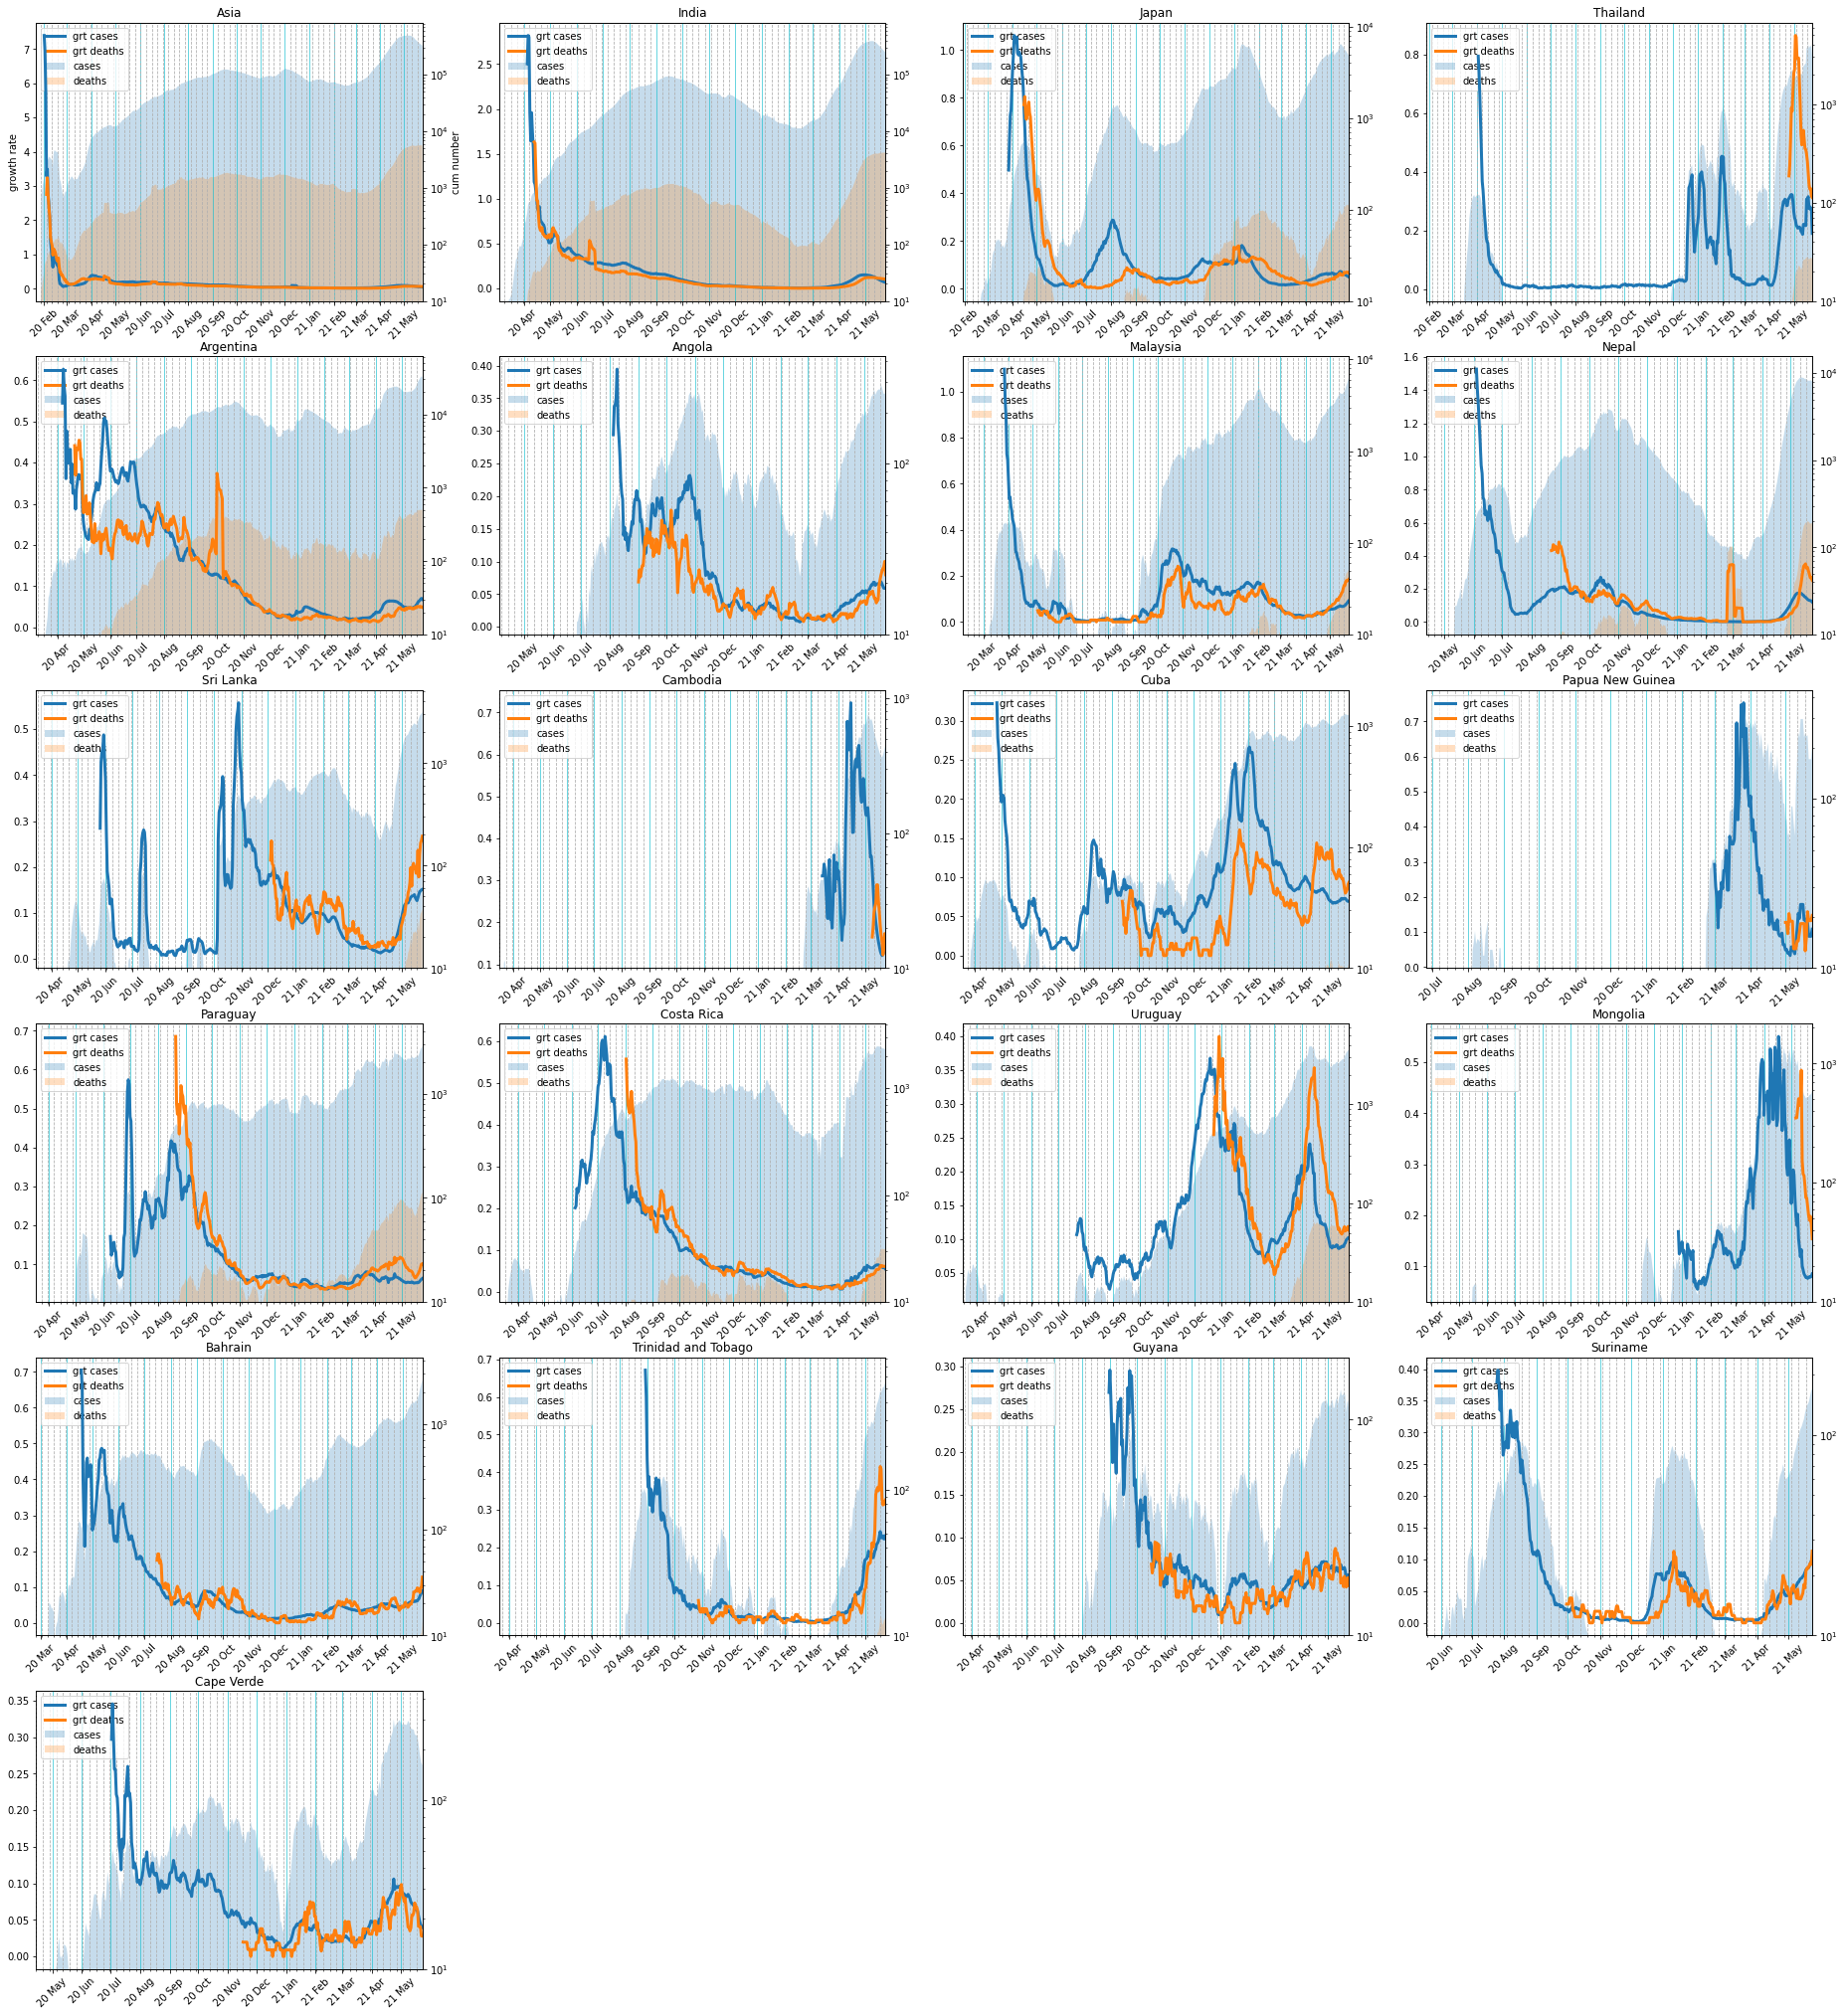

In [54]:
#
# グラフ描画
#
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(country_set)/cols) # タイルの行数
fig = plt.figure(figsize=(8*cols, 6*rows))

for (cid, country) in enumerate(country_set):
    window = 7 # 移動平均を求める期間の長さ
    ctry_df = global_df.loc[country] # 当該国のデータフレーム
    cases = ctry_df["total_cases"] # 累積症例数
    deaths = ctry_df["total_deaths"] # 累積死亡数
    daily_cases = ctry_df["new_cases"] # 新規症例数
    daily_deaths = ctry_df["new_deaths"] # 新規死亡数
    grt_cases = ctry_df["grt_cases"] # 新規症例数
    grt_deaths = ctry_df["grt_deaths"] # 新規死亡数

    # add_subplot を使って複数の図をタイル状に配置
    ax1 = fig.add_subplot(rows, cols, cid+1)
    
    # x軸の表示範囲を適切にするために，累積症例数が10を超えた最初の日を記録しておく
    xmin = cases[cases>10].index[0]
    xmax = cases.index[-1]

    # 累積症例数/死亡者数
    ax1.plot(grt_cases, label="grt cases",linewidth=3, zorder=10)
    ax1.plot(grt_deaths, label="grt deaths",linewidth=3, zorder=10)
#    ax1 = fancy_ax(ax1) # x軸の見栄えを整える ← x1 軸を見えなくするので意味がない

    ax2 = ax1.twinx()
    # 日次症例数/死亡者数（alpha=0.5として半透過させている）
    ax2.fill_between(cases.index, daily_cases.rolling(window).mean(), label="cases", alpha=0.25, zorder=1)
    ax2.fill_between(deaths.index, daily_deaths.rolling(window).mean(), label="deaths", alpha=0.25, zorder=2)
    # 片対数グラフにする
    ax2.set_yscale('log')
    ax2.set_ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする
    ax2 = fancy_ax(ax2) # x軸の見栄えを整える ← 見栄えを良くする対象を x2 軸に
#    ax2.set_xticks([]) # ← x2 軸の xticks は残す

    # 軸の見栄えを整える
    ax1.legend(loc='upper left')
    ax1.set_xlim((xmin,xmax))
    ax1.set_title(country)

    # 最初のグラフにだけy1軸とy2軸のラベルをつける
    if cid == 0:
        ax1.set_ylabel("growth rate")
        ax2.set_ylabel("cum number")

    # y1軸をy2軸の上に表示させる
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)

    # グラフのタイトルと凡例を表示
    ax1.set_title(country) # "Pref"列の第0要素（先頭要素）をタイトルとして表示
    h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
    h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
    ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない

plt.show()